In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ls

drive/  sample_data/


In [3]:
cd /content/drive/MyDrive/PFA/shared/PFA/wlasl-processed

/content/drive/.shortcut-targets-by-id/16gMgbmqNvGL7_NDEhCQmSV5JdsLllzfh/PFA/wlasl-processed


In [4]:
ls

 features_df.csv
 LRCN_model_structure_plot.png
 missing.txt
 models/
 nslt_1000.json
 nslt_100.json
 nslt_2000.json
 nslt_300.json
 sample.mp4
 __temp__.mp4
 test_videos/
 test_videosbefore_test-Output-SeqLen20.mp4
'test_videoscomputer ASL-Output-SeqLen20.mp4'
 test_videosCOMPUTER-Output-SeqLen20.mp4
 test_videoscomputer_test-Output-SeqLen20.mp4
'test_videoswake-before funeral ASL-Output-SeqLen20.mp4'
 tmp/
 videos/
 WLASL_v0.3.json


### **<font style="color:#112B3C"> Import the Libraries</font>**

We will start by installing and importing the required libraries.

In [5]:
!pip install ez_setup

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ez-setup: filename=ez_setup-0.9-py3-none-any.whl size=11015 sha256=efb8ed97832f28c456abf270cda1266e32d34fe591eab09287611e6610b14360
  Stored in directory: /root/.cache/pip/wheels/f4/78/bd/f88c8eddfd5a8bf2a029e5cd8bc7a9914597002b081a000ffe
Successfully built ez-setup


In [6]:
!pip install moviepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install pafy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
pip install youtube-dl==2020.12.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 33.7 MB/s 


In [11]:
pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-70qiq48z
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-70qiq48z
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=180247 sha256=e5d5cd6ea80a522dca5c58aa29add3d3ea56a7a3cd494019695a2f41a391a829
  Stored in directory: /tmp/pip-ephem-wheel-cache-4w47wmef/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [16]:
# import required libraries
import json
import os
import cv2
import pandas as pd
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from moviepy import *
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [17]:
from tensorflow_docs.vis import embed
from tensorflow.keras import layers
from tensorflow import keras

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import imageio
import cv2
import os

In [18]:
seed_constant = 42
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

 ### **<font style="color:#112B3C">Load WLAS Dataset</font>**

In [19]:
cd /content/drive/MyDrive/PFA/shared/PFA/wlasl-processed

/content/drive/.shortcut-targets-by-id/16gMgbmqNvGL7_NDEhCQmSV5JdsLllzfh/PFA/wlasl-processed


In [20]:
main_path = ''
wlas_df = pd.read_json(main_path + 'WLASL_v0.3.json')

In [21]:
wlas_df.head()

,gloss,instances
0,book,"[{'bbox': [385, 37, 885, 720], 'fps': 25, 'fra..."
1,drink,"[{'bbox': [551, 68, 1350, 1080], 'fps': 25, 'f..."
2,computer,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
3,before,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
4,chair,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."


In [22]:
ls

 features_df.csv
 LRCN_model_structure_plot.png
 missing.txt
 models/
 nslt_1000.json
 nslt_100.json
 nslt_2000.json
 nslt_300.json
 sample.mp4
 __temp__.mp4
 test_videos/
 test_videosbefore_test-Output-SeqLen20.mp4
'test_videoscomputer ASL-Output-SeqLen20.mp4'
 test_videosCOMPUTER-Output-SeqLen20.mp4
 test_videoscomputer_test-Output-SeqLen20.mp4
'test_videoswake-before funeral ASL-Output-SeqLen20.mp4'
 tmp/
 videos/
 WLASL_v0.3.json


In [23]:
wlas_df.iloc[1]["instances"][0]["video_id"], wlas_df.iloc[1]["instances"][0]["bbox"]

('69302', [551, 68, 1350, 1080])

In [24]:
wlas_df.shape

(2000, 2)

### **<font style="color:#112B3C">Extract the available videos list from the dataset</font>**

In [25]:
cd /content/drive/MyDrive/PFA/shared/PFA/wlasl-processed

/content/drive/.shortcut-targets-by-id/16gMgbmqNvGL7_NDEhCQmSV5JdsLllzfh/PFA/wlasl-processed


In [26]:
ls

 features_df.csv
 LRCN_model_structure_plot.png
 missing.txt
 models/
 nslt_1000.json
 nslt_100.json
 nslt_2000.json
 nslt_300.json
 sample.mp4
 __temp__.mp4
 test_videos/
 test_videosbefore_test-Output-SeqLen20.mp4
'test_videoscomputer ASL-Output-SeqLen20.mp4'
 test_videosCOMPUTER-Output-SeqLen20.mp4
 test_videoscomputer_test-Output-SeqLen20.mp4
'test_videoswake-before funeral ASL-Output-SeqLen20.mp4'
 tmp/
 videos/
 WLASL_v0.3.json


### **<font style="color:#112B3C">Extract the available videos list from the dataset</font>**

In [27]:
def get_videos_ids(json_list):
    """
    function to check if the video id is available in the dataset
    and return the viedos ids of the current instance
    
    input: instance json list
    output: list of videos_ids
    
    """
    videos_list = []    
    for ins in json_list:
        video_id = ins['video_id']
        if os.path.exists(f'{main_path}videos/{video_id}.mp4'):
            videos_list.append(video_id)
    return videos_list

In [28]:
def get_json_features(json_list):
    """
    function to check if the video id is available in the dataset
    and return the viedos ids and url or any other featrue of the current instance
    
    input: instance json list
    output: list of videos_ids
    
    """
    videos_ids = []
    videos_urls = []
    split_urls = []
    bboxs = []
    for ins in json_list:
        video_id = ins['video_id']
        video_url = ins['url']
        split = ins['split']
        bbox = ins['bbox']
        if os.path.exists(f'{main_path}videos/{video_id}.mp4'):
            videos_ids.append(video_id)
            videos_urls.append(video_url)
            split_urls.append(split)
            bboxs.append(bbox)
    return videos_ids, videos_urls, split_urls, bboxs

In [29]:
with open(main_path+'WLASL_v0.3.json', 'r') as data_file:
    json_data = data_file.read()

instance_json = json.loads(json_data)

In [30]:
get_videos_ids(instance_json[0]['instances'])[0]

'07069'

In [31]:
len(get_videos_ids(instance_json[0]['instances']))

5

In [32]:
wlas_df['videos_ids'] = wlas_df['instances'].apply(get_videos_ids)

In [33]:
features_df = pd.DataFrame(columns=['gloss', 'video_id', 'url', 'split', 'bbox'])
for row in wlas_df.iterrows():
#     print(row[1][1])
    ids, urls, split, bboxs = get_json_features(row[1][1])
    word = [row[1][0]] * len(ids)
    df = pd.DataFrame(list(zip(word, ids, urls, split, bboxs)), columns = features_df.columns)
    features_df = features_df.append(df, ignore_index=True)

In [34]:

features_df.index.name = 'index'
features_df

,gloss,video_id,url,split,bbox
index,,,,,
0,book,07069,https://signstock.blob.core.windows.net/signsc...,train,"[462, 44, 949, 720]"
1,book,07068,https://s3-us-west-1.amazonaws.com/files.start...,train,"[234, 17, 524, 414]"
2,book,07070,https://media.asldeafined.com/vocabulary/14666...,train,"[131, 26, 526, 480]"
3,book,07099,http://www.aslsearch.com/signs/videos/book.mp4,val,"[162, 54, 528, 400]"
4,book,07074,https://www.signingsavvy.com/signs/mp4/14/1432...,train,"[82, 11, 212, 192]"
...,...,...,...,...,...
7286,propaganda,44962,https://www.signingsavvy.com/signs/mp4/9/9962.mp4,train,"[54, 10, 221, 192]"
7287,proper,44970,https://media.spreadthesign.com/video/mp4/13/3...,val,"[84, 16, 249, 240]"
7288,proper,44971,https://media.asldeafined.com/vocabulary/14687...,train,"[166, 2, 554, 480]"


In [35]:
# save to csv
#features_df.to_csv('features_df.csv', index=False)

In [36]:
#features_df = pd.read_csv("features_df.csv")

In [37]:
cd /content/drive/MyDrive/PFA/shared/PFA/wlasl-processed

/content/drive/.shortcut-targets-by-id/16gMgbmqNvGL7_NDEhCQmSV5JdsLllzfh/PFA/wlasl-processed


In [38]:
ls

 features_df.csv
 LRCN_model_structure_plot.png
 missing.txt
 models/
 nslt_1000.json
 nslt_100.json
 nslt_2000.json
 nslt_300.json
 sample.mp4
 __temp__.mp4
 test_videos/
 test_videosbefore_test-Output-SeqLen20.mp4
'test_videoscomputer ASL-Output-SeqLen20.mp4'
 test_videosCOMPUTER-Output-SeqLen20.mp4
 test_videoscomputer_test-Output-SeqLen20.mp4
'test_videoswake-before funeral ASL-Output-SeqLen20.mp4'
 tmp/
 videos/
 WLASL_v0.3.json


In [39]:
features_df.index.name = 'index'
features_df

,gloss,video_id,url,split,bbox
index,,,,,
0,book,07069,https://signstock.blob.core.windows.net/signsc...,train,"[462, 44, 949, 720]"
1,book,07068,https://s3-us-west-1.amazonaws.com/files.start...,train,"[234, 17, 524, 414]"
2,book,07070,https://media.asldeafined.com/vocabulary/14666...,train,"[131, 26, 526, 480]"
3,book,07099,http://www.aslsearch.com/signs/videos/book.mp4,val,"[162, 54, 528, 400]"
4,book,07074,https://www.signingsavvy.com/signs/mp4/14/1432...,train,"[82, 11, 212, 192]"
...,...,...,...,...,...
7286,propaganda,44962,https://www.signingsavvy.com/signs/mp4/9/9962.mp4,train,"[54, 10, 221, 192]"
7287,proper,44970,https://media.spreadthesign.com/video/mp4/13/3...,val,"[84, 16, 249, 240]"
7288,proper,44971,https://media.asldeafined.com/vocabulary/14687...,train,"[166, 2, 554, 480]"


In [40]:
features_df[features_df['gloss'] == "computer"]

,gloss,video_id,url,split,bbox
index,,,,,
17,computer,12328,https://www.signingsavvy.com/signs/mp4/6/6326.mp4,train,"[56, 11, 240, 192]"
18,computer,12312,https://s3-us-west-1.amazonaws.com/files.start...,val,"[422, 50, 824, 720]"
19,computer,12311,https://media.spreadthesign.com/video/mp4/13/5...,train,"[27, 0, 313, 240]"
20,computer,12338,http://www.aslsearch.com/signs/videos/computer...,train,"[221, 42, 501, 400]"
21,computer,12313,https://s3-us-west-1.amazonaws.com/files.start...,train,"[409, 51, 833, 720]"
22,computer,12314,https://signstock.blob.core.windows.net/signsc...,train,"[257, 38, 1684, 1080]"
23,computer,12315,https://signstock.blob.core.windows.net/signsc...,val,"[436, 35, 1765, 1080]"
24,computer,12316,https://signstock.blob.core.windows.net/signsc...,train,"[412, 18, 1698, 1080]"
25,computer,12317,https://signstock.blob.core.windows.net/signsc...,train,"[473, 44, 1708, 1080]"


### **<font style="color:#205375">Visualize the Data with its Labels</font>**

In [41]:
features_df

,gloss,video_id,url,split,bbox
index,,,,,
0,book,07069,https://signstock.blob.core.windows.net/signsc...,train,"[462, 44, 949, 720]"
1,book,07068,https://s3-us-west-1.amazonaws.com/files.start...,train,"[234, 17, 524, 414]"
2,book,07070,https://media.asldeafined.com/vocabulary/14666...,train,"[131, 26, 526, 480]"
3,book,07099,http://www.aslsearch.com/signs/videos/book.mp4,val,"[162, 54, 528, 400]"
4,book,07074,https://www.signingsavvy.com/signs/mp4/14/1432...,train,"[82, 11, 212, 192]"
...,...,...,...,...,...
7286,propaganda,44962,https://www.signingsavvy.com/signs/mp4/9/9962.mp4,train,"[54, 10, 221, 192]"
7287,proper,44970,https://media.spreadthesign.com/video/mp4/13/3...,val,"[84, 16, 249, 240]"
7288,proper,44971,https://media.asldeafined.com/vocabulary/14687...,train,"[166, 2, 554, 480]"


In [42]:
N = 4
TOP_N_CLASSES = list(features_df.gloss.value_counts().head(N).index)

In [43]:
TOP_N_CLASSES

['before', 'computer', 'cool', 'go']

In [44]:
# get all categories classes
all_classes = features_df.gloss.value_counts().keys().to_list()
all_classes

['before',
 'computer',
 'cool',
 'go',
 'cousin',
 'accident',
 'drink',
 'change',
 'cold',
 'delay',
 'last',
 'bowling',
 'bar',
 'later',
 'check',
 'laugh',
 'bed',
 'letter',
 'play',
 'call',
 'pizza',
 'far',
 'champion',
 'help',
 'leave',
 'candy',
 'deaf',
 'interest',
 'hear',
 'basketball',
 'fault',
 'environment',
 'full',
 'move',
 'near',
 'government',
 'ago',
 'daughter',
 'brother',
 'past',
 'cry',
 'argue',
 'delicious',
 'balance',
 'perspective',
 'lose',
 'appointment',
 'give',
 'fat',
 'make',
 'outside',
 'dark',
 'corn',
 'hot',
 'like',
 'graduate',
 'many',
 'fine',
 'family',
 'no',
 'form',
 'onion',
 'necklace',
 'her',
 'australia',
 'list',
 'california',
 'happy',
 'mother',
 'point',
 'good',
 'alone',
 'postpone',
 'humble',
 'example',
 'now',
 'problem',
 'grammar',
 'approve',
 'improve',
 'heart',
 'child',
 'party',
 'choose',
 'crash',
 'country',
 'convince',
 'close',
 'practice',
 'president',
 'jealous',
 'chat',
 'order',
 'expensive',

In [45]:
classes_dict = {}
for i in range(len(all_classes)):
    classes_dict[all_classes[i]] = i

classes_dict

{'before': 0,
 'computer': 1,
 'cool': 2,
 'go': 3,
 'cousin': 4,
 'accident': 5,
 'drink': 6,
 'change': 7,
 'cold': 8,
 'delay': 9,
 'last': 10,
 'bowling': 11,
 'bar': 12,
 'later': 13,
 'check': 14,
 'laugh': 15,
 'bed': 16,
 'letter': 17,
 'play': 18,
 'call': 19,
 'pizza': 20,
 'far': 21,
 'champion': 22,
 'help': 23,
 'leave': 24,
 'candy': 25,
 'deaf': 26,
 'interest': 27,
 'hear': 28,
 'basketball': 29,
 'fault': 30,
 'environment': 31,
 'full': 32,
 'move': 33,
 'near': 34,
 'government': 35,
 'ago': 36,
 'daughter': 37,
 'brother': 38,
 'past': 39,
 'cry': 40,
 'argue': 41,
 'delicious': 42,
 'balance': 43,
 'perspective': 44,
 'lose': 45,
 'appointment': 46,
 'give': 47,
 'fat': 48,
 'make': 49,
 'outside': 50,
 'dark': 51,
 'corn': 52,
 'hot': 53,
 'like': 54,
 'graduate': 55,
 'many': 56,
 'fine': 57,
 'family': 58,
 'no': 59,
 'form': 60,
 'onion': 61,
 'necklace': 62,
 'her': 63,
 'australia': 64,
 'list': 65,
 'california': 66,
 'happy': 67,
 'mother': 68,
 'point': 69

In [46]:
features_df['gloss_indx'] = features_df.gloss.map(classes_dict)

In [47]:
features_df

,gloss,video_id,url,split,bbox,gloss_indx
index,,,,,,
0,book,07069,https://signstock.blob.core.windows.net/signsc...,train,"[462, 44, 949, 720]",727
1,book,07068,https://s3-us-west-1.amazonaws.com/files.start...,train,"[234, 17, 524, 414]",727
2,book,07070,https://media.asldeafined.com/vocabulary/14666...,train,"[131, 26, 526, 480]",727
3,book,07099,http://www.aslsearch.com/signs/videos/book.mp4,val,"[162, 54, 528, 400]",727
4,book,07074,https://www.signingsavvy.com/signs/mp4/14/1432...,train,"[82, 11, 212, 192]",727
...,...,...,...,...,...,...
7286,propaganda,44962,https://www.signingsavvy.com/signs/mp4/9/9962.mp4,train,"[54, 10, 221, 192]",1349
7287,proper,44970,https://media.spreadthesign.com/video/mp4/13/3...,val,"[84, 16, 249, 240]",1171
7288,proper,44971,https://media.asldeafined.com/vocabulary/14687...,train,"[166, 2, 554, 480]",1171


> *let's initialize some constants*

In [48]:
ls

 features_df.csv
 LRCN_model_structure_plot.png
 missing.txt
 models/
 nslt_1000.json
 nslt_100.json
 nslt_2000.json
 nslt_300.json
 sample.mp4
 __temp__.mp4
 test_videos/
 test_videosbefore_test-Output-SeqLen20.mp4
'test_videoscomputer ASL-Output-SeqLen20.mp4'
 test_videosCOMPUTER-Output-SeqLen20.mp4
 test_videoscomputer_test-Output-SeqLen20.mp4
'test_videoswake-before funeral ASL-Output-SeqLen20.mp4'
 tmp/
 videos/
 WLASL_v0.3.json


In [49]:
# Specify the hight and width each video frame will be resized in our dataset.
IMAGE_HEIGHT, IMAGE_WIDTH = 64, 64

# Specify the number of frames of a video that will be fed to the model as one sequence.
SEQUENCE_LENGTH = 20

# Specify the directory containing the dataset.
DATASET_DIR = "videos/"

# Specify the list containing the names of the classes used for training.
CLASSES_LIST = all_classes

**Note:** *The **`IMAGE_HEIGHT`**, **`IMAGE_WIDTH`** and **`SEQUENCE_LENGTH`** constants can be increased for better results, although increasing the sequence length is only effective to a certain point, and increasing the values will result in the process being more computationally expensive.*

In [50]:
def get_index_of_video(vd_id):
    i = 0
    for item in features_df["video_id"]:
        if item == vd_id:
            break
        i = i+1
    return i

In [51]:
def get_index_of_video(vd_id):
  return features_df['video_id'].loc[lambda x: x==vd_id].index[0]

In [52]:
def bounding_box_img(img,bbox):
  x_min, y_min, x_max, y_max = bbox
  bbox_obj = img[y_min:y_max, x_min:x_max]
  return bbox_obj

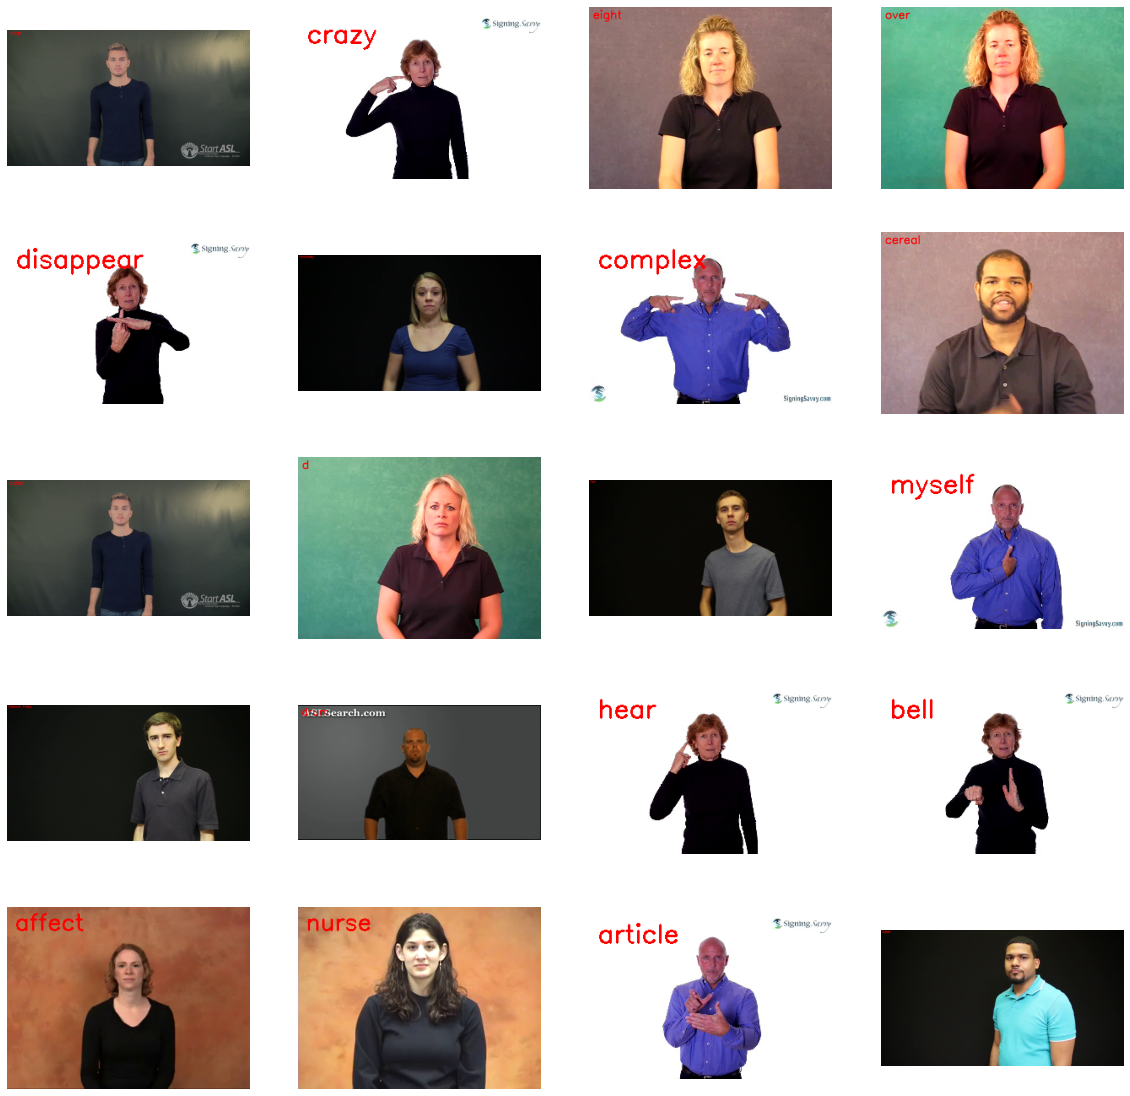

In [53]:
# Create a Matplotlib figure and specify the size of the figure
plt.figure(figsize=(20, 20))

# Get the names of all classes/categories in UCF50
all_classes_names = os.listdir(DATASET_DIR)

# generate a list of 20 random values. The values will be between 0-50 where 50 is the
# total number of classes in the dataset
random_range = random.sample(range(len(all_classes_names)), 20)

# Iterating through all the generated random values.
for counter, random_index in enumerate(random_range, 1):

    # Retrieve the list of all the video files present in the randomly selected Class Directory
    video_files_names_list = os.listdir(DATASET_DIR)

    #Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    selected_video_file_name = random.choice(video_files_names_list)
    
    # Retrieve a Class Name using the Random Index.
    idx = get_index_of_video(selected_video_file_name.split(".")[0])
    selected_class_Name = features_df.iloc[idx].gloss
    # xmin, ymin, xmax, ymax
    bbox = features_df.iloc[idx].bbox

    # Initialize a VideoCapture object to read from the video File.
    video_reader = cv2.VideoCapture(f'{DATASET_DIR}{selected_video_file_name}')

    # Read the first frame of the video file
    _, bgr_frame = video_reader.read()

    # release the video object
    video_reader.release()

    #  convert the frame from VGR into RBG format.
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
    #rgb_frame = bounding_box_img(rgb_frame, bbox)
    #cv2.rectangle(rgb_frame,(bbox[0],bbox[1]),(bbox[0]+(bbox[2]-bbox[0]),bbox[1]+(bbox[3]-bbox[1])),(0,255,0),2)
    # Write the class name on the video frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Display the frame
    plt.subplot(5, 4, counter); plt.imshow(rgb_frame);plt.axis('off')
   


## **<font style="color:#112B3C">Preprocess the Dataset</font>**

Next, we will perform some preprocessing on the dataset. First, we will read the video files from the dataset and resize the frames of the videos to a fixed width and height, to reduce the computations and normalized the data to range `[0-1]` by dividing the pixel values with `255`, which makes convergence faster while training the network.

### **<font style="color:#205375">Create a Function to Extract, Resize & Normalize Frames</font>**

We will create a function **`frames_extraction()`** that will create a list containing the resized and normalized frames of a video whose path is passed to it as an argument. The function will read the video file frame by frame, although not all frames are added to the list as we will only need an evenly distributed sequence length of frames. 

In [58]:
def bounding_box_img(img,bbox):
  x_min, y_min, x_max, y_max = bbox
  bbox_obj = img[y_min:y_max, x_min:x_max]
  return bbox_obj

In [59]:
def frames_extraction(video_path, bbox):
    """
    This function will extract the required frames from a video after resizing and normalizing them.
    Args:
    video_path: The path of the video in the disk, whose frames are to be extracted.

    Returns:
    frames_list: A list containing the resized and normalized frames of the video.
    """

    # Declare a list to store video frames.
    frames_list = []

    # Read the video File using the videoCapture object.
    video_reader = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)
    
    # Iterate through the Video frames:
    for frame_counter in range(SEQUENCE_LENGTH):

        # Set the current frame position of the video
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Reading the frame from the video.
        success, frame = video_reader.read()

        # check if the video frame is not successfully read the break the loop
        if not success:
            break

        # Resize the Frame to fixed height and width.
        #frame = bounding_box_img(frame, bbox)
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))

        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies wetween 0 and 1
        normalized_frame = resized_frame / 255 

        # Append the normalized frame into the frames list
        frames_list.append(normalized_frame)

    # Release the VideoCapture object.
    video_reader.release()

    # return the frames list.
    return frames_list


### **<font style="color:#205375">Create a Function for Dataset Creation</font>**

Now we will create a function **`create_dataset()`** that will iterate through all the video located in the **`DATASET_DIR`** constant and will call the function  **`frame_extraction()`** on every video file and return the frames (**`features`**), class index ( **`labels`**), and video file path (**`video_files_paths`**).

In [ ]:
def bounding_box_img(img,bbox):
  x_min, y_min, x_max, y_max = bbox
  bbox_obj = img[y_min:y_max, x_min:x_max]
  return bbox_obj

In [60]:
def create_dataset():
    """
    This function will extract the data of the videos and create the required dataset.
    Retuns:
    features: A list containing the extracted frames of the videos.
    labels :  A list containing the indexes of the classes associated with the video
    video_files_paths :  A list containing the paths of the videos in the disk.
    """

    # Declared Empty Lists to store the features, labels and video file path values.
    features = []
    labels = []
    video_files_paths = []
    split = []
       

    # Get the list of video files present in the specific class name directory.
    files_list = os.listdir(DATASET_DIR)
    count = 0
    for file_name in files_list:

        # Display the name of the video whose data is being extracted and its number in iterations
        

        # Get the complete video path.
        video_file_path = os.path.join(DATASET_DIR, file_name)
        idx = get_index_of_video(file_name.split(".")[0])
        selected_class_Name = features_df.iloc[idx].gloss
        bbox = features_df.iloc[idx].bbox
        
        if selected_class_Name in TOP_N_CLASSES:
          print(f"Extracting Data of file: {file_name}, number: {count}")
          
          # Extract the frames of the video file.
          frames = frames_extraction(video_file_path, bbox)
          #frames = load_rgb_frames_from_video(DATASET_DIR, file_name, 1, SEQUENCE_LENGTH)

          # check if the extracted frames are equal to the SEQUENCE_LENGTH specified above.
          # So ignore the videos having less than the SEQUENCE_LENGTH.
          if len(frames) == SEQUENCE_LENGTH:

              # get the video's class name
              class_index = features_df.iloc[idx].gloss_indx
              splt = features_df.iloc[idx].split
              # Append the data to their repective list
              features.append(frames)
              labels.append(class_index)
              video_files_paths.append(video_file_path)
              split.append(splt)
              count = count +1
              

    # Converting the list to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)
    split = np.asarray(split)

    # Return the frames, class_index and video_file_path
    return features, labels, split

Now we will utilize the function **`create_dataset()`** created above to extract the data and create the required dataset.

In [61]:
# Creat the dataset
features, labels, split = create_dataset()

Extracting Data of file: 24940.mp4, number: 0
Extracting Data of file: 24973.mp4, number: 1
Extracting Data of file: 24956.mp4, number: 2
Extracting Data of file: 24946.mp4, number: 3
Extracting Data of file: 24955.mp4, number: 4
Extracting Data of file: 24952.mp4, number: 5
Extracting Data of file: 24943.mp4, number: 6
Extracting Data of file: 24962.mp4, number: 7
Extracting Data of file: 24947.mp4, number: 8
Extracting Data of file: 24961.mp4, number: 9
Extracting Data of file: 24960.mp4, number: 10
Extracting Data of file: 24941.mp4, number: 11
Extracting Data of file: 24954.mp4, number: 12
Extracting Data of file: 13196.mp4, number: 13
Extracting Data of file: 13203.mp4, number: 14
Extracting Data of file: 13198.mp4, number: 15
Extracting Data of file: 13197.mp4, number: 16
Extracting Data of file: 12317.mp4, number: 17
Extracting Data of file: 12338.mp4, number: 18
Extracting Data of file: 12318.mp4, number: 19
Extracting Data of file: 12328.mp4, number: 20
Extracting Data of file

## **<font style="color:#112B3C">Split the Data into Train and Test Set</font>**

As of now, we have the required **`features`** (a NumPy array containing all the extracted frames of the videos) and **`one_hot_encoded_labels`** (also a Numpy array containing all class labels in one hot encoded format). So now, we will split our data to create training and testing sets. We will also shuffle the dataset before the split to avoid any bias and get splits representing the overall distribution of the data.

In [62]:
train_data = []
train_labels = []
test_data = []
test_labels = []
for i in range(len(split)):
  if split[i]=="train":
    train_data.append(features[i])
    train_labels.append(labels[i])
  else:
    test_data.append(features[i])
    test_labels.append(labels[i])

train_data = np.asarray(train_data)
train_labels = np.array(train_labels)

test_data = np.asarray(test_data)
test_labels = np.array(test_labels)

In [63]:
features_df

,gloss,video_id,url,split,bbox,gloss_indx
index,,,,,,
0,book,07069,https://signstock.blob.core.windows.net/signsc...,train,"[462, 44, 949, 720]",727
1,book,07068,https://s3-us-west-1.amazonaws.com/files.start...,train,"[234, 17, 524, 414]",727
2,book,07070,https://media.asldeafined.com/vocabulary/14666...,train,"[131, 26, 526, 480]",727
3,book,07099,http://www.aslsearch.com/signs/videos/book.mp4,val,"[162, 54, 528, 400]",727
4,book,07074,https://www.signingsavvy.com/signs/mp4/14/1432...,train,"[82, 11, 212, 192]",727
...,...,...,...,...,...,...
7286,propaganda,44962,https://www.signingsavvy.com/signs/mp4/9/9962.mp4,train,"[54, 10, 221, 192]",1349
7287,proper,44970,https://media.spreadthesign.com/video/mp4/13/3...,val,"[84, 16, 249, 240]",1171
7288,proper,44971,https://media.asldeafined.com/vocabulary/14687...,train,"[166, 2, 554, 480]",1171


In [67]:
TOP_N_CLASSES

['before', 'computer', 'cool', 'go']

In [69]:
df = features_df[(features_df['gloss'] == "before") |(features_df["gloss"]=="computer") | (features_df["gloss"]=="cool") | (features_df['gloss']=="go") ]

In [80]:
df

,gloss,video_id,url,split,bbox,gloss_indx,video_name
index,,,,,,,
17,computer,12328,https://www.signingsavvy.com/signs/mp4/6/6326.mp4,train,"[56, 11, 240, 192]",1,12328.mp4
18,computer,12312,https://s3-us-west-1.amazonaws.com/files.start...,val,"[422, 50, 824, 720]",1,12312.mp4
19,computer,12311,https://media.spreadthesign.com/video/mp4/13/5...,train,"[27, 0, 313, 240]",1,12311.mp4
20,computer,12338,http://www.aslsearch.com/signs/videos/computer...,train,"[221, 42, 501, 400]",1,12338.mp4
21,computer,12313,https://s3-us-west-1.amazonaws.com/files.start...,train,"[409, 51, 833, 720]",1,12313.mp4
22,computer,12314,https://signstock.blob.core.windows.net/signsc...,train,"[257, 38, 1684, 1080]",1,12314.mp4
23,computer,12315,https://signstock.blob.core.windows.net/signsc...,val,"[436, 35, 1765, 1080]",1,12315.mp4
24,computer,12316,https://signstock.blob.core.windows.net/signsc...,train,"[412, 18, 1698, 1080]",1,12316.mp4
25,computer,12317,https://signstock.blob.core.windows.net/signsc...,train,"[473, 44, 1708, 1080]",1,12317.mp4


In [79]:
df['video_name'] = df['video_id'].apply(lambda x: str(x)+".mp4")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [81]:
df

,gloss,video_id,url,split,bbox,gloss_indx,video_name
index,,,,,,,
17,computer,12328,https://www.signingsavvy.com/signs/mp4/6/6326.mp4,train,"[56, 11, 240, 192]",1,12328.mp4
18,computer,12312,https://s3-us-west-1.amazonaws.com/files.start...,val,"[422, 50, 824, 720]",1,12312.mp4
19,computer,12311,https://media.spreadthesign.com/video/mp4/13/5...,train,"[27, 0, 313, 240]",1,12311.mp4
20,computer,12338,http://www.aslsearch.com/signs/videos/computer...,train,"[221, 42, 501, 400]",1,12338.mp4
21,computer,12313,https://s3-us-west-1.amazonaws.com/files.start...,train,"[409, 51, 833, 720]",1,12313.mp4
22,computer,12314,https://signstock.blob.core.windows.net/signsc...,train,"[257, 38, 1684, 1080]",1,12314.mp4
23,computer,12315,https://signstock.blob.core.windows.net/signsc...,val,"[436, 35, 1765, 1080]",1,12315.mp4
24,computer,12316,https://signstock.blob.core.windows.net/signsc...,train,"[412, 18, 1698, 1080]",1,12316.mp4
25,computer,12317,https://signstock.blob.core.windows.net/signsc...,train,"[473, 44, 1708, 1080]",1,12317.mp4


In [70]:
MAX_SEQ_LENGTH = 20
NUM_FEATURES = 1024
IMG_SIZE = 128

EPOCHS = 5

In [71]:
center_crop_layer = layers.CenterCrop(IMG_SIZE, IMG_SIZE)


def crop_center(frame):
    cropped = center_crop_layer(frame[None, ...])
    cropped = cropped.numpy().squeeze()
    return cropped


# Following method is modified from this tutorial:
# https://www.tensorflow.org/hub/tutorials/action_recognition_with_tf_hub
def load_video(path, max_frames=0):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = crop_center(frame)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)

In [72]:
def build_feature_extractor():
    feature_extractor = keras.applications.DenseNet121(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
    )
    preprocess_input = keras.applications.densenet.preprocess_input

    inputs = keras.Input((IMG_SIZE, IMG_SIZE, 3))
    preprocessed = preprocess_input(inputs)

    outputs = feature_extractor(preprocessed)
    return keras.Model(inputs, outputs, name="feature_extractor")


feature_extractor = build_feature_extractor()


# Label preprocessing with StringLookup.
label_processor = keras.layers.StringLookup(
    num_oov_indices=0, vocabulary=np.unique(df["gloss"]), mask_token=None
)
print(label_processor.get_vocabulary())

['before', 'computer', 'cool', 'go']


In [82]:
def prepare_all_videos(df, root_dir):
    num_samples = len(df)
    video_paths = df["video_name"].values.tolist()
    labels = df["gloss"].values
    labels = label_processor(labels[..., None]).numpy()

    # `frame_features` are what we will feed to our sequence model.
    frame_features = np.zeros(
        shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
    )

    # For each video.
    for idx, path in enumerate(video_paths):
        # Gather all its frames and add a batch dimension.
        frames = load_video(os.path.join(root_dir, path))

        # Pad shorter videos.
        if len(frames) < MAX_SEQ_LENGTH:
            diff = MAX_SEQ_LENGTH - len(frames)
            padding = np.zeros((diff, IMG_SIZE, IMG_SIZE, 3))
            frames = np.concatenate(frames, padding)

        frames = frames[None, ...]

        # Initialize placeholder to store the features of the current video.
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
        )

        # Extract features from the frames of the current video.
        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                if np.mean(batch[j, :]) > 0.0:
                    temp_frame_features[i, j, :] = feature_extractor.predict(
                        batch[None, j, :]
                    )

                else:
                    temp_frame_features[i, j, :] = 0.0

        frame_features[idx,] = temp_frame_features.squeeze()

    return frame_features, labels

In [87]:
train_dt, train_lbs = prepare_all_videos(df[df['split']=="train"], "/content/drive/MyDrive/PFA/shared/PFA/wlasl-processed/videos/")

In [89]:
test_dt, test_lbs = prepare_all_videos(df[df['split']=="val"], "/content/drive/MyDrive/PFA/shared/PFA/wlasl-processed/videos/")

In [83]:
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=output_dim
        )
        self.sequence_length = sequence_length
        self.output_dim = output_dim

    def call(self, inputs):
        # The inputs are of shape: `(batch_size, frames, num_features)`
        length = tf.shape(inputs)[1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_positions = self.position_embeddings(positions)
        return inputs + embedded_positions

    def compute_mask(self, inputs, mask=None):
        mask = tf.reduce_any(tf.cast(inputs, "bool"), axis=-1)
        return mask

In [84]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim, dropout=0.3
        )
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation=tf.nn.gelu), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()

    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]

        attention_output = self.attention(inputs, inputs, attention_mask=mask)
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

In [90]:
def get_compiled_model():
    sequence_length = MAX_SEQ_LENGTH
    embed_dim = NUM_FEATURES
    dense_dim = 4
    num_heads = 1
    classes = len(label_processor.get_vocabulary())

    inputs = keras.Input(shape=(None, None))
    x = PositionalEmbedding(
        sequence_length, embed_dim, name="frame_position_embedding"
    )(inputs)
    x = TransformerEncoder(embed_dim, dense_dim, num_heads, name="transformer_layer")(x)
    x = layers.GlobalMaxPooling1D()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(classes, activation="softmax")(x)
    model = keras.Model(inputs, outputs)

    model.compile(
        optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )
    return model


def run_experiment():
    filepath = "/content/drive/MyDrive/PFA/shared/PFA/wlasl-processed/tmp/video_classifier"
    checkpoint = keras.callbacks.ModelCheckpoint(
        filepath, save_weights_only=True, save_best_only=True, verbose=1
    )

    model = get_compiled_model()
    history = model.fit(
        train_dt,
        train_lbs,
        validation_split=0.15,
        epochs=EPOCHS,
        callbacks=[checkpoint],
    )

    model.load_weights(filepath)
    _, accuracy = model.evaluate(test_dt, test_lbs)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

    return model

In [91]:
trained_model = run_experiment()

Epoch 1/5
1/2 [==============>...............] - ETA: 2s - loss: 3.3591 - accuracy: 0.4375
Epoch 1: val_loss improved from inf to 11.80985, saving model to /content/drive/MyDrive/PFA/shared/PFA/wlasl-processed/tmp/video_classifier
2/2 [==============================] - 4s 1s/step - loss: 3.7182 - accuracy: 0.4118 - val_loss: 11.8098 - val_accuracy: 0.0000e+00
Epoch 2/5
1/2 [==============>...............] - ETA: 0s - loss: 7.7246 - accuracy: 0.3438
Epoch 2: val_loss improved from 11.80985 to 5.22039, saving model to /content/drive/MyDrive/PFA/shared/PFA/wlasl-processed/tmp/video_classifier
2/2 [==============================] - 0s 242ms/step - loss: 7.7736 - accuracy: 0.3235 - val_loss: 5.2204 - val_accuracy: 0.0000e+00
Epoch 3/5
1/2 [==============>...............] - ETA: 0s - loss: 5.5165 - accuracy: 0.2812
Epoch 3: val_loss did not improve from 5.22039
2/2 [==============================] - 0s 33ms/step - loss: 5.2059 - accuracy: 0.3235 - val_loss: 5.4668 - val_accuracy: 0.0000e+00


In [92]:
def prepare_single_video(frames):
    frame_features = np.zeros(shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32")

    # Pad shorter videos.
    if len(frames) < MAX_SEQ_LENGTH:
        diff = MAX_SEQ_LENGTH - len(frames)
        padding = np.zeros((diff, IMG_SIZE, IMG_SIZE, 3))
        frames = np.concatenate(frames, padding)

    frames = frames[None, ...]

    # Extract features from the frames of the current video.
    for i, batch in enumerate(frames):
        video_length = batch.shape[0]
        length = min(MAX_SEQ_LENGTH, video_length)
        for j in range(length):
            if np.mean(batch[j, :]) > 0.0:
                frame_features[i, j, :] = feature_extractor.predict(batch[None, j, :])
            else:
                frame_features[i, j, :] = 0.0

    return frame_features

In [93]:
def predict_action(path):
    class_vocab = label_processor.get_vocabulary()

    frames = load_video(os.path.join("test", path))
    frame_features = prepare_single_video(frames)
    probabilities = trained_model.predict(frame_features)[0]

    for i in np.argsort(probabilities)[::-1]:
        print(f"  {class_vocab[i]}: {probabilities[i] * 100:5.2f}%")
    return frames

In [94]:
def to_gif(images):
    converted_images = images.astype(np.uint8)
    imageio.mimsave("animation.gif", converted_images, fps=10)
    return embed.embed_file("animation.gif")

Test video path: 13203.mp4
  go: 49.84%
  cool: 45.35%
  computer:  3.61%
  before:  1.20%



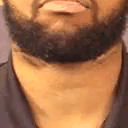

In [97]:
test_video = np.random.choice(df["video_name"].values.tolist())
print(f"Test video path: {test_video}")
test_frames = predict_action("/content/drive/MyDrive/PFA/shared/PFA/wlasl-processed/videos/"+test_video)
to_gif(test_frames[:MAX_SEQ_LENGTH])

Here I notice problem of video cropping, Now we will use cropping using bbox

---------------------

-----------------------

In [ ]:
df

,gloss,video_id,url,split,bbox,gloss_indx,video_name
index,,,,,,,
17,computer,12328,https://www.signingsavvy.com/signs/mp4/6/6326.mp4,train,"[56, 11, 240, 192]",1,12328.mp4
18,computer,12312,https://s3-us-west-1.amazonaws.com/files.start...,val,"[422, 50, 824, 720]",1,12312.mp4
19,computer,12311,https://media.spreadthesign.com/video/mp4/13/5...,train,"[27, 0, 313, 240]",1,12311.mp4
20,computer,12338,http://www.aslsearch.com/signs/videos/computer...,train,"[221, 42, 501, 400]",1,12338.mp4
21,computer,12313,https://s3-us-west-1.amazonaws.com/files.start...,train,"[409, 51, 833, 720]",1,12313.mp4
22,computer,12314,https://signstock.blob.core.windows.net/signsc...,train,"[257, 38, 1684, 1080]",1,12314.mp4
23,computer,12315,https://signstock.blob.core.windows.net/signsc...,val,"[436, 35, 1765, 1080]",1,12315.mp4
24,computer,12316,https://signstock.blob.core.windows.net/signsc...,train,"[412, 18, 1698, 1080]",1,12316.mp4
25,computer,12317,https://signstock.blob.core.windows.net/signsc...,train,"[473, 44, 1708, 1080]",1,12317.mp4


In [98]:
MAX_SEQ_LENGTH = 20
NUM_FEATURES = 1024
IMG_SIZE = 128

EPOCHS = 5

In [114]:
def bounding_box_img(img,bbox):
  x_min, y_min, x_max, y_max = bbox
  bbox_obj = img[y_min:y_max, x_min:x_max]
  bbox_obj = cv2.resize(bbox_obj, (IMG_SIZE, IMG_SIZE))
  return bbox_obj


# Following method is modified from this tutorial:
# https://www.tensorflow.org/hub/tutorials/action_recognition_with_tf_hub
def load_video(path, bbox, max_frames=0):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = bounding_box_img(frame, bbox)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)

In [108]:
def build_feature_extractor():
    feature_extractor = keras.applications.DenseNet121(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
    )
    preprocess_input = keras.applications.densenet.preprocess_input

    inputs = keras.Input((IMG_SIZE, IMG_SIZE, 3))
    preprocessed = preprocess_input(inputs)

    outputs = feature_extractor(preprocessed)
    return keras.Model(inputs, outputs, name="feature_extractor")


feature_extractor = build_feature_extractor()


# Label preprocessing with StringLookup.
label_processor = keras.layers.StringLookup(
    num_oov_indices=0, vocabulary=np.unique(df["gloss"]), mask_token=None
)
print(label_processor.get_vocabulary())

['before', 'computer', 'cool', 'go']


In [112]:
def prepare_all_videos(df, root_dir):
    num_samples = len(df)
    video_paths = df["video_name"].values.tolist()
    labels = df["gloss"].values
    labels = label_processor(labels[..., None]).numpy()
    bboxs = df["bbox"].values

    # `frame_features` are what we will feed to our sequence model.
    frame_features = np.zeros(
        shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
    )

    # For each video.
    for idx, path in enumerate(video_paths):
        # Gather all its frames and add a batch dimension.
        frames = load_video(os.path.join(root_dir, path), bboxs[idx])

        # Pad shorter videos.
        if len(frames) < MAX_SEQ_LENGTH:
            diff = MAX_SEQ_LENGTH - len(frames)
            padding = np.zeros((diff, IMG_SIZE, IMG_SIZE, 3))
            frames = np.concatenate(frames, padding)

        frames = frames[None, ...]

        # Initialize placeholder to store the features of the current video.
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
        )

        # Extract features from the frames of the current video.
        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                if np.mean(batch[j, :]) > 0.0:
                    temp_frame_features[i, j, :] = feature_extractor.predict(
                        batch[None, j, :]
                    )

                else:
                    temp_frame_features[i, j, :] = 0.0

        frame_features[idx,] = temp_frame_features.squeeze()

    return frame_features, labels

In [115]:
train_dt, train_lbs = prepare_all_videos(df[df['split']=="train"], "/content/drive/MyDrive/PFA/shared/PFA/wlasl-processed/videos/")

In [116]:
test_dt, test_lbs = prepare_all_videos(df[df['split']=="val"], "/content/drive/MyDrive/PFA/shared/PFA/wlasl-processed/videos/")

In [117]:
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=output_dim
        )
        self.sequence_length = sequence_length
        self.output_dim = output_dim

    def call(self, inputs):
        # The inputs are of shape: `(batch_size, frames, num_features)`
        length = tf.shape(inputs)[1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_positions = self.position_embeddings(positions)
        return inputs + embedded_positions

    def compute_mask(self, inputs, mask=None):
        mask = tf.reduce_any(tf.cast(inputs, "bool"), axis=-1)
        return mask

In [118]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim, dropout=0.3
        )
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation=tf.nn.gelu), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()

    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]

        attention_output = self.attention(inputs, inputs, attention_mask=mask)
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

In [137]:
def get_compiled_model():
    sequence_length = MAX_SEQ_LENGTH
    embed_dim = NUM_FEATURES
    dense_dim = 4
    num_heads = 1
    classes = len(label_processor.get_vocabulary())

    inputs = keras.Input(shape=(None, None))
    x = PositionalEmbedding(
        sequence_length, embed_dim, name="frame_position_embedding"
    )(inputs)
    x = TransformerEncoder(embed_dim, dense_dim, num_heads, name="transformer_layer")(x)
    x = layers.GlobalMaxPooling1D()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(classes, activation="softmax")(x)
    model = keras.Model(inputs, outputs)

    model.compile(
        optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )
    return model


def run_experiment():
    filepath = "/content/drive/MyDrive/PFA/shared/PFA/wlasl-processed/tmp/video_classifier"
    checkpoint = keras.callbacks.ModelCheckpoint(
        filepath, save_weights_only=True, save_best_only=True, verbose=1
    )

    model = get_compiled_model()
    history = model.fit(
        train_dt,
        train_lbs,
        validation_data=(test_dt, test_lbs),
        epochs=EPOCHS,
        callbacks=[checkpoint],
    )

    model.load_weights(filepath)
    _, accuracy = model.evaluate(test_dt, test_lbs)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

    return model

In [138]:
trained_model = run_experiment()

Epoch 1/5
1/2 [==============>...............] - ETA: 1s - loss: 2.8000 - accuracy: 0.3125
Epoch 1: val_loss improved from inf to 3.95342, saving model to /content/drive/MyDrive/PFA/shared/PFA/wlasl-processed/tmp/video_classifier
2/2 [==============================] - 2s 479ms/step - loss: 3.7515 - accuracy: 0.3000 - val_loss: 3.9534 - val_accuracy: 0.5000
Epoch 2/5
1/2 [==============>...............] - ETA: 0s - loss: 3.9669 - accuracy: 0.3438
Epoch 2: val_loss improved from 3.95342 to 3.66831, saving model to /content/drive/MyDrive/PFA/shared/PFA/wlasl-processed/tmp/video_classifier
2/2 [==============================] - 1s 606ms/step - loss: 4.0926 - accuracy: 0.3250 - val_loss: 3.6683 - val_accuracy: 0.1250
Epoch 3/5
1/2 [==============>...............] - ETA: 0s - loss: 3.3446 - accuracy: 0.2812
Epoch 3: val_loss improved from 3.66831 to 3.12508, saving model to /content/drive/MyDrive/PFA/shared/PFA/wlasl-processed/tmp/video_classifier
2/2 [==============================] - 0s 23

In [139]:
def prepare_single_video(frames):
    frame_features = np.zeros(shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32")

    # Pad shorter videos.
    if len(frames) < MAX_SEQ_LENGTH:
        diff = MAX_SEQ_LENGTH - len(frames)
        padding = np.zeros((diff, IMG_SIZE, IMG_SIZE, 3))
        frames = np.concatenate(frames, padding)

    frames = frames[None, ...]

    # Extract features from the frames of the current video.
    for i, batch in enumerate(frames):
        video_length = batch.shape[0]
        length = min(MAX_SEQ_LENGTH, video_length)
        for j in range(length):
            if np.mean(batch[j, :]) > 0.0:
                frame_features[i, j, :] = feature_extractor.predict(batch[None, j, :])
            else:
                frame_features[i, j, :] = 0.0

    return frame_features

In [140]:
def predict_action(path, bbox):
    class_vocab = label_processor.get_vocabulary()

    frames = load_video(os.path.join("test", path), bbox)
    frame_features = prepare_single_video(frames)
    probabilities = trained_model.predict(frame_features)[0]

    for i in np.argsort(probabilities)[::-1]:
        print(f"  {class_vocab[i]}: {probabilities[i] * 100:5.2f}%")
    return frames

In [141]:
def to_gif(images):
    converted_images = images.astype(np.uint8)
    imageio.mimsave("animation.gif", converted_images, fps=10)
    return embed.embed_file("animation.gif")

In [142]:
np.random.randint(0,len(df))

10

Test video path: 12319.mp4
  computer: 84.30%
  cool: 11.80%
  before:  2.64%
  go:  1.26%



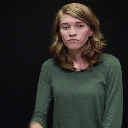

In [143]:
test_video = df.iloc[np.random.randint(0,len(df))]
print(f"Test video path: {test_video.video_name}")
test_frames = predict_action("/content/drive/MyDrive/PFA/shared/PFA/wlasl-processed/videos/"+test_video.video_name, test_video.bbox)
to_gif(test_frames[:MAX_SEQ_LENGTH])